In [4]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# HW1

In [79]:
mat = scipy.io.loadmat('Assign1_regression_data_incomePred.mat')

In [80]:
x1 = mat['x1']
x2 = mat['x2']
x3 = mat['x3']
x4 = mat['x4']
y = mat['y']

In [ ]:
# create 4 scatter plots, by plotting yi as a function of each of the regressors

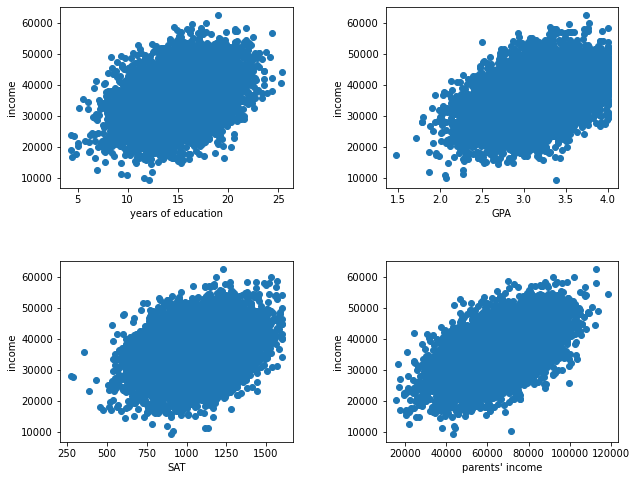

In [95]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
axs[0,0].scatter(x1, y)
axs[0,0].set_xlabel('years of education')
axs[0,0].set_ylabel('income')
axs[0,1].scatter(x2, y)
axs[0,1].set_xlabel('GPA')
axs[0,1].set_ylabel('income')
axs[1,0].scatter(x3, y)
axs[1,0].set_xlabel('SAT')
axs[1,0].set_ylabel('income')
axs[1,1].scatter(x4, y)
axs[1,1].set_xlabel('''parents' income''')
axs[1,1].set_ylabel('income')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
'''Perform simple linear regression (just 1 regressor at a time) and
calculate the b values from the regression. Also, calculate the Pearson correlation (r ) between x
and y.'''

In [96]:
# Create a column of ones with the same number of rows as x1
ones_column = np.ones((x1.shape[0], 1))
# Concatenate the column of ones to the left of x1
x1 = np.hstack((ones_column, x1))
x2 = np.hstack((ones_column, x2))
x3 = np.hstack((ones_column, x3))
x4 = np.hstack((ones_column, x4))

In [98]:
# beta values
b1 = np.linalg.inv(x1.T @ x1) @ x1.T @ y
b2 = np.linalg.inv(x2.T @ x2) @ x2.T @ y
b3 = np.linalg.inv(x3.T @ x3) @ x3.T @ y
b4 = np.linalg.inv(x4.T @ x4) @ x4.T @ y
b1

array([[22031.97229774],
       [  933.49535528]])

In [99]:
b2

array([[11352.40828725],
       [ 7967.01704488]])

In [100]:
b3

array([[2.14476250e+04],
       [1.37648897e+01]])

In [101]:
b4

array([[1.84830156e+04],
       [2.70347781e-01]])

In [105]:
# rerun the x1-4
# calculate the Pearson correlation (r) between x and y
from scipy import stats
print(stats.pearsonr(x1.reshape(-1),y.reshape(-1))[0])
print(stats.pearsonr(x2.reshape(-1),y.reshape(-1))[0])
print(stats.pearsonr(x3.reshape(-1),y.reshape(-1))[0])
print(stats.pearsonr(x4.reshape(-1),y.reshape(-1))[0])

0.3725780494142301
0.42585966287672666
0.35263547899655645
0.5480277729803721


In [73]:
from scipy import stats

xx = np.array([2,4,3,34,23])
yy = np.array([21,12,3,11,17])
stats.pearsonr(xx.reshape(-1),yy.reshape(-1))[0]**2

0.002366878494073559

In [55]:
xx = np.array([2, 4, 3, 34, 23]).reshape(-1, 1)
yy = np.array([21, 12, 3, 11, 17])

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xx, yy)
y_predd = regressor.predict(xx)
y_predd

array([12.5448505 , 12.59041291, 12.5676317 , 13.27384907, 13.02325581])

In [62]:
mean = np.mean(yy)
mean

12.8

In [74]:
ss_explained = np.sum([(y_predd[i] - mean)**2 for i in range(5)])

In [75]:
ss_residual = np.sum([(y_predd[i] - yy[i])**2 for i in range(5)]) 

In [76]:
ss_explained/(ss_explained+ss_residual)

0.002366878494073553

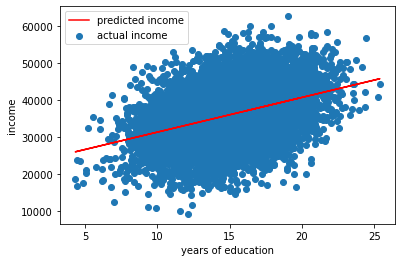

In [107]:
plt.scatter(x1,y,label = 'actual income')
plt.plot(x1,b1[0]+x1*b1[1],'r-',label = 'predicted income')
plt.xlabel('years of education')
plt.ylabel('income')
plt.legend()
plt.show()

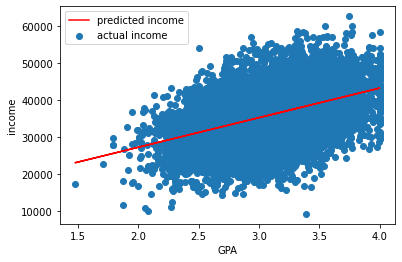

In [108]:
plt.scatter(x2,y,label = 'actual income')
plt.plot(x2,b2[0]+x2*b2[1],'r-',label = 'predicted income')
plt.xlabel('GPA')
plt.ylabel('income')
plt.legend()
plt.show()

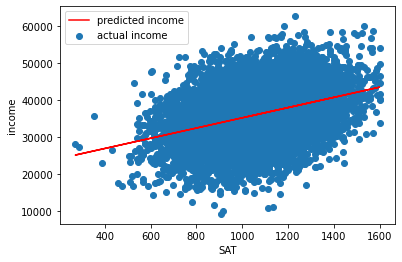

In [109]:
plt.scatter(x3,y,label = 'actual income')
plt.plot(x3,b3[0]+x3*b3[1],'r-',label = 'predicted income')
plt.xlabel('SAT')
plt.ylabel('income')
plt.legend()
plt.show()

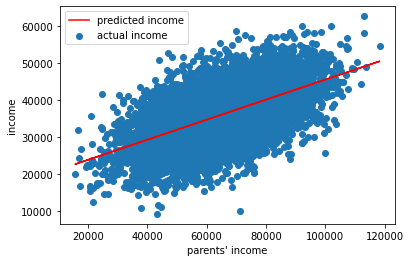

In [110]:
plt.scatter(x4,y,label = 'actual income')
plt.plot(x4,b4[0]+x4*b4[1],'r-',label = 'predicted income')
plt.xlabel('''parents' income''')
plt.ylabel('income')
plt.legend()
plt.show()

In [ ]:
'''Next, plot the results of the multiple regression, showing predicted income vs. actual income
(abscissa), and report your b values and the correlation strength.
'''

In [111]:
X = np.hstack((ones_column, x1, x2, x3, x4))

In [116]:
B = np.linalg.inv(X.T @ X) @ X.T @ y
B

array([[-2.94487877e+03],
       [ 4.35855738e+02],
       [ 5.13743393e+03],
       [ 4.05418833e+00],
       [ 1.88663130e-01]])

In [113]:
pred = X @ B
pred

array([[41337.3629713 ],
       [41129.32854466],
       [40870.42328224],
       ...,
       [30028.32498113],
       [34329.06624915],
       [39859.16642484]])

In [89]:
stats.pearsonr(x4.reshape(-1),x3.reshape(-1))[0]

0.38279525381669444

In [115]:
# R value, correlation between the predicted values and the actual values that were measured.
stats.pearsonr(pred.reshape(-1),y.reshape(-1))[0]

0.6541970971647895

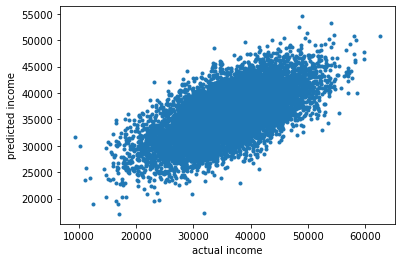

In [120]:
plt.plot(y,pred,'.')
plt.xlabel('actual income')
plt.ylabel('predicted income')
plt.show()

# HW2

### Task 1

In [131]:
import math
x = np.linspace(-np.pi, np.pi, 1000)
mu = 0
theta_e = 0.25
theta_i = 1.25

In [132]:
def g(x,theta):
    return (1/theta*np.sqrt(2*np.pi))*np.exp(-1/2 * ((x-mu)/theta)**2)
y1 = g(x,theta_e)
y2 = g(x,theta_i)
diff = y1-y2

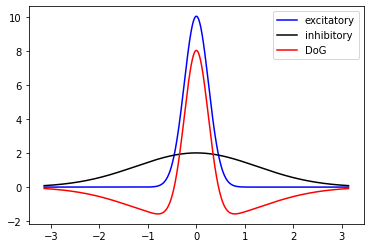

In [133]:
plt.plot(x, y1, 'b', label='excitatory')
plt.plot(x, y2, 'k', label='inhibitory') 
plt.plot(x, diff, 'r', label='DoG')
plt.legend()  
plt.show()

### Task 2

In [134]:
freq = [1,2,4]
y = [np.cos(freq[i]*x) for i in range(3)]

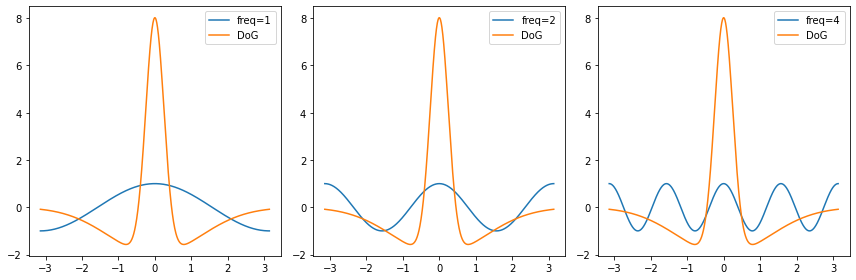

In [141]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(x, y[0], label='freq=1')
axs[0].plot(x, diff, label='DoG')
axs[0].legend()  

axs[1].plot(x, y[1], label='freq=2')
axs[1].plot(x, diff, label='DoG')
axs[1].legend()  

axs[2].plot(x, y[2], label='freq=4')
axs[2].plot(x, diff, label='DoG')
axs[2].legend()  

plt.tight_layout()
plt.show()

### Task 3

In [8]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

In [9]:
steps = np.arange(0.1, 20.1, 0.1)

In [10]:
y1 = g(x,theta_e)
y2 = g(x,theta_i)
diff = y1-y2

In [12]:
result = []
for i in range(len(steps)):
    freq = steps[i]
    res = np.cos(freq*x) @ diff.T
    result.append(res)

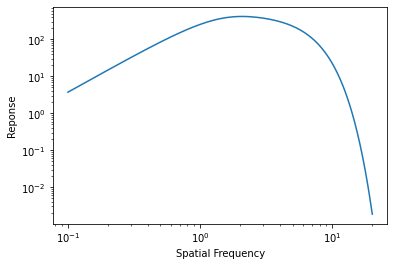

In [13]:
plt.loglog(steps,result)
plt.xlabel('Spatial Frequency')
plt.ylabel('Reponse')
plt.show()

In [14]:
# freq for max response
steps[np.argmax(result)]

2.1

### Task 4

In [149]:
I = np.identity(10)
K = np.matrix(
    [[0.1, 0.1, 0.1],
     [0.1, 0.2, 0.1],
     [0.1, 0.1, 0.1]])

In [151]:
S = np.zeros((8, 8))

for i in range(8):
    for j in range(8):
        # Extract the 3x3 region from the original matrix
        region = I[i:i+3, j:j+3]
        S[i, j] = np.sum(region * K)

In [152]:
S

array([[1. , 0.7, 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0.7, 1. , 0.7, 0.3, 0. , 0. , 0. , 0. ],
       [0.3, 0.7, 1. , 0.7, 0.3, 0. , 0. , 0. ],
       [0. , 0.3, 0.7, 1. , 0.7, 0.3, 0. , 0. ],
       [0. , 0. , 0.3, 0.7, 1. , 0.7, 0.3, 0. ],
       [0. , 0. , 0. , 0.3, 0.7, 1. , 0.7, 0.3],
       [0. , 0. , 0. , 0. , 0.3, 0.7, 1. , 0.7],
       [0. , 0. , 0. , 0. , 0. , 0.3, 0.7, 1. ]])

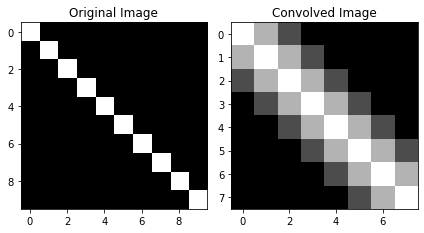

In [153]:
fig, axs = plt.subplots(1,2)

axs[0].set_title('Original Image')
img1 = axs[0].imshow(I, cmap='gray')

axs[1].set_title('Convolved Image')
img2 = axs[1].imshow(S, cmap='gray')
plt.tight_layout()
plt.show()

In [154]:
from scipy.signal import convolve2d
S = convolve2d(I, K, mode='same')

In [155]:
S.shape

(10, 10)

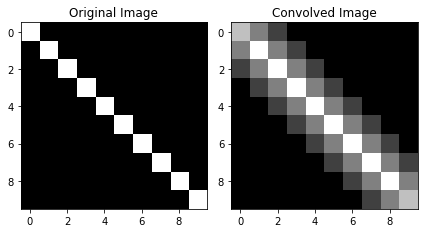

In [158]:
fig, axs = plt.subplots(1,2)

axs[0].set_title('Original Image')
img1 = axs[0].imshow(I, cmap='gray')

axs[1].set_title('Convolved Image')
img2 = axs[1].imshow(S, cmap='gray')
plt.tight_layout()
plt.show()

### Task 5

In [43]:
iw = 20 # width of kernel
ih = 20 # height of kernel
x, y = np.meshgrid(np.linspace(-(iw-1)/2, (iw-1)/2, iw), np.linspace(-(ih-1)/2, (ih-1)/2, ih))
eccen = np.sqrt(x**2 + y**2)

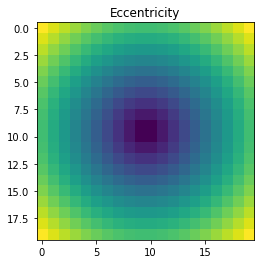

In [146]:
plt.imshow(eccen)
plt.title('Eccentricity')
plt.show()

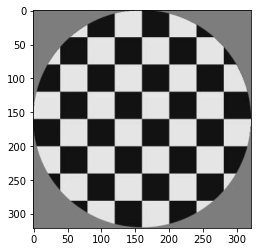

In [104]:
image = plt.imread("Checkerboard_Psy8507.jpg")
plt.imshow(image,cmap='gray')
plt.show()

In [105]:
sd_exc = 0.5
sd_inh = 2.5

In [106]:
exc = np.exp(-eccen**2/(2*sd_exc**2))*1/(sd_exc**2*(2*np.pi))
inh = np.exp(-eccen**2/(2*sd_inh**2))*1/(sd_inh**2*(2*np.pi))
DoG = exc-inh

In [107]:
output = convolve2d(image, DoG, mode='same')

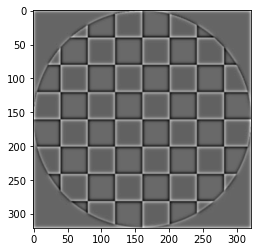

In [108]:
plt.imshow(output,cmap='gray')
plt.show()

In [164]:
img = plt.imread('tiger_in_grass_Psy8507.jpg')

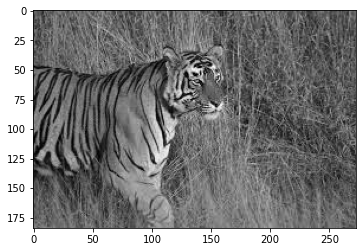

In [168]:
plt.imshow(img,cmap='gray')
plt.show()

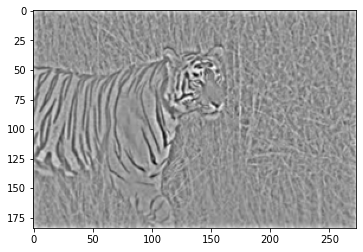

In [165]:
output2 = convolve2d(img, DoG, mode='same')
plt.imshow(output2,cmap='gray')
plt.show()

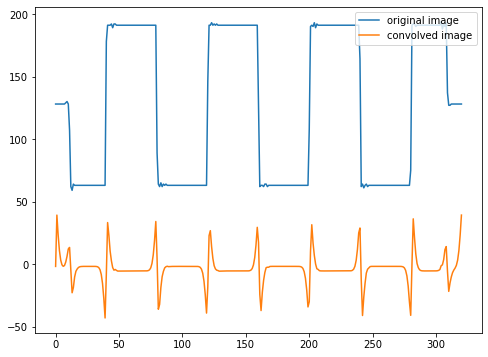

In [129]:
plt.figure(figsize=(8, 6))
plt.plot(image[100,:],label='original image')
plt.plot(output[100,:],label='convolved image')
plt.legend(loc='upper right')
plt.show()

# HW3

## Task 1

In [5]:
import math
x = np.linspace(-5, 5, 10001)
mu = 0
theta = 1
g = (1 / (theta * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / theta)**2)

In [6]:
np.sum(g)

999.9994281823369

#### The sum of g(x) is greater than 1 because I am summing the probability at each x value. The correct method is to create small rectangles with heights equal to g(x) and widths equal to the difference between two adjacent x values.

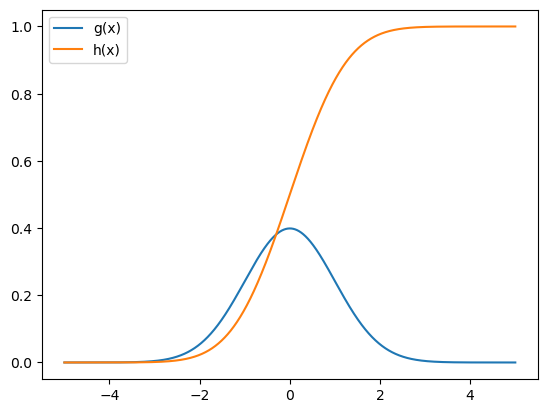

In [14]:
dx = x[1] - x[0]
pdf_values = g
cdf_values = np.cumsum(pdf_values) * dx  
cdf_values = cdf_values / cdf_values[-1]
plt.plot(x, g,label='g(x)')
plt.plot(x, cdf_values, label='h(x)')
plt.legend()
plt.show()

In [16]:
# calculate a, b, d'

In [17]:
hit_rate = 0.8
false_alarm_rate = 0.07

In [18]:
diff_hit = np.abs(cdf_values-(hit_rate))
diff_false_alarm = np.abs(cdf_values-(false_alarm_rate))

In [19]:
a = x[np.argmin(diff_hit)]

In [20]:
a

0.8410000000000002

In [21]:
b = -x[np.argmin(diff_false_alarm)]

In [22]:
b

1.476

In [23]:
d_prime = a+b
d_prime

2.317

## Task 2

In [28]:
from scipy.stats import norm

In [48]:
hit_rate = np.linspace(0.001, 0.999, 999)

In [49]:
d_prime = [1, 2, 3]
# d'= norminv(hit rate) - norminv(false alarm rate) in matlab
false_alarm_rate = norm.cdf(norm.ppf(hit_rate)-d_prime[0])

In [31]:
miss = 1 - hit_rate
# Find the point where miss == false_alarm_rate
diff = np.abs(miss - false_alarm_rate)
index = np.argmin(diff)
hit_unbias = hit_rate[index]
false_alarm_unbias = false_alarm_rate[index]

When d'=1, false alarm rate: 0.31 hit rate: 0.69


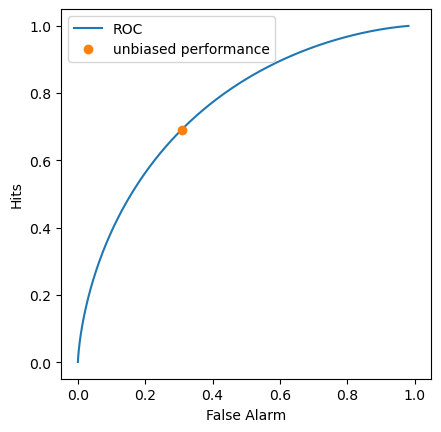

In [37]:
print("When d'=1, false alarm rate: "+str(np.round(false_alarm_unbias,2)), "hit rate: "+str(np.round(hit_unbias,2)))
plt.plot(false_alarm_rate,hit_rate,label='ROC')
plt.plot(false_alarm_unbias, hit_unbias,'o',label='unbiased performance')
plt.xlabel('False Alarm')
plt.ylabel('Hits')
plt.axis('square')
plt.legend()
plt.show()

When d'=2, false alarm rate: 0.16 hit rate: 0.84


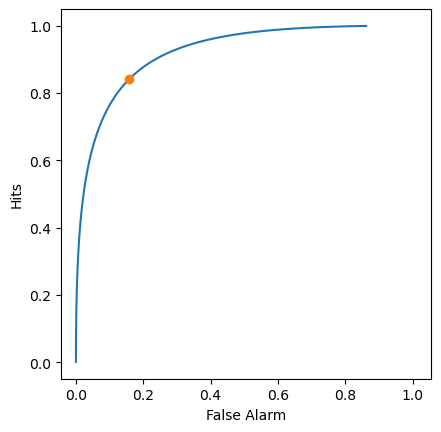

In [38]:
false_alarm_rate = norm.cdf(norm.ppf(hit_rate)-d_prime[1])
diff = np.abs(miss - false_alarm_rate)
index = np.argmin(diff)
hit_unbias = hit_rate[index]
false_alarm_unbias = false_alarm_rate[index]
print("When d'=2, false alarm rate: "+str(np.round(false_alarm_unbias,2)), "hit rate: "+str(np.round(hit_unbias,2)))
plt.plot(false_alarm_rate,hit_rate,label='ROC')
plt.plot(false_alarm_unbias, hit_unbias,'o',label='unbiased performance')
plt.xlabel('False Alarm')
plt.ylabel('Hits')
plt.axis('square')
plt.show()

When d'=3, false alarm rate: 0.07 hit rate: 0.93


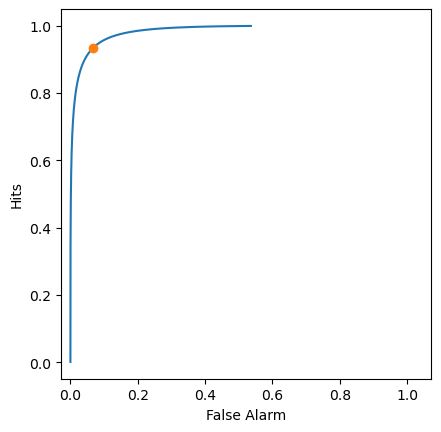

In [39]:
false_alarm_rate = norm.cdf(norm.ppf(hit_rate)-d_prime[2])
diff = np.abs(miss - false_alarm_rate)
index = np.argmin(diff)
hit_unbias = hit_rate[index]
false_alarm_unbias = false_alarm_rate[index]
print("When d'=3, false alarm rate: "+str(np.round(false_alarm_unbias,2)), "hit rate: "+str(np.round(hit_unbias,2)))
plt.plot(false_alarm_rate,hit_rate,label='ROC')
plt.plot(false_alarm_unbias, hit_unbias,'o',label='unbiased performance')
plt.xlabel('False Alarm')
plt.ylabel('Hits')
plt.axis('square')
plt.show()

#### Unbiased performance means that the false alarm rate equals the miss rate. As d' increases, it becomes easier to separate the distributions of signal plus noise and noise. Consequently, the dot moves toward the upper left, indicating a higher hit rate and lower false alarm rate as d' gets larger.

## Task3

In [40]:
d_prime = np.linspace(0,6,601)

In [41]:
accuracy = norm.cdf(d_prime)

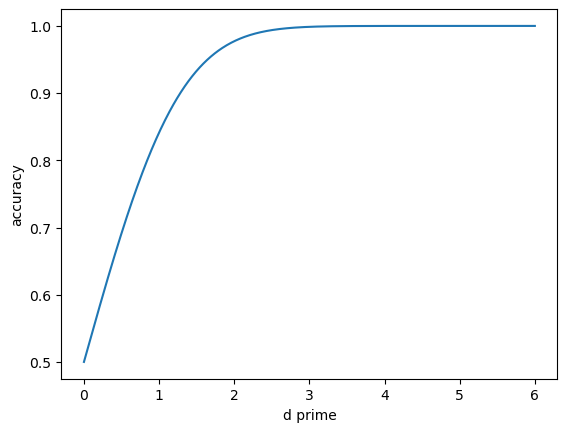

In [42]:
plt.plot(d_prime,accuracy)
plt.xlabel('d prime')
plt.ylabel('accuracy')
plt.show()

## Task 4

In [43]:
d_prime = 1
u0 = 0
u1 = 1
sd = 1
noise = np.random.normal(u0, sd, 10000)
signal = np.random.normal(u1, sd, 10000)

In [44]:
x = np.linspace(-4,4,801)

In [45]:
# proportion that is above criterion in the signal distribution
hits = [np.sum(signal > i) / len(signal) for i in x]
# proportion that is above criterion in the noise distribution
false_alarms = [np.sum(noise > i) / len(noise) for i in x]

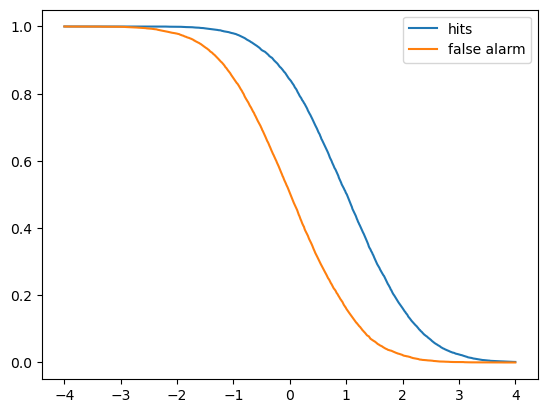

In [46]:
plt.plot(x, hits, label='hits')
plt.plot(x, false_alarms, label = 'false alarm')
plt.legend()
plt.show()

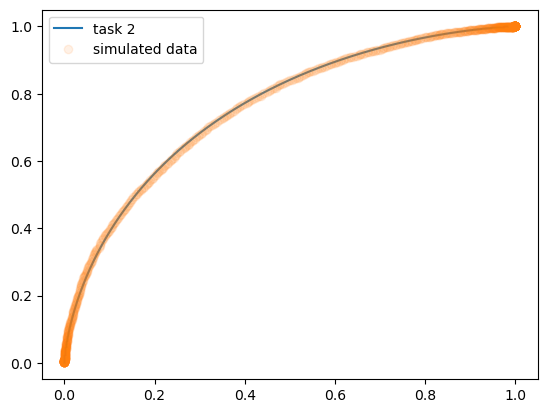

In [50]:
plt.plot(false_alarm_rate,hit_rate, label = 'task 2')
plt.plot(false_alarms,hits,'o',alpha = 0.1, label = 'simulated data')
plt.legend()
plt.show()

#### The simulated data conform well to the ROC curve from task 2.